In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
heart_data= pd.read_csv('heart.csv')

In [110]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [111]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [112]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [113]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [114]:
print('There are', heart_data.shape[0],'rows and ',heart_data.shape[1],'coloums in dataset')

There are 918 rows and  12 coloums in dataset


In [115]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [116]:
heart_data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [117]:
heart_data['Sex'].replace('F',1, inplace=True)
heart_data['Sex'].replace('M',0, inplace=True)

In [118]:
heart_data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [119]:
heart_data['ChestPainType'].replace('ATA',0, inplace=True)
heart_data['ChestPainType'].replace('NAP',1, inplace=True)
heart_data['ChestPainType'].replace('TA',2, inplace=True)
heart_data['ChestPainType'].replace('ASY',3, inplace=True)

In [120]:
heart_data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [121]:
heart_data['RestingECG'].replace('Normal',0, inplace=True)
heart_data['RestingECG'].replace('ST', 1, inplace=True)
heart_data['RestingECG'].replace('LVH',2, inplace=True)

In [122]:
heart_data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [123]:
heart_data['ST_Slope'].replace('Up',0, inplace=True)
heart_data['ST_Slope'].replace('Flat', 1, inplace=True)
heart_data['ST_Slope'].replace('Down',2, inplace=True)

In [124]:
heart_data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [125]:
heart_data['ExerciseAngina'].replace('Y',0, inplace=True)
heart_data['ExerciseAngina'].replace('N', 1, inplace=True)


C:\Users\Sakshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HeartDisease', ylabel='Density'>

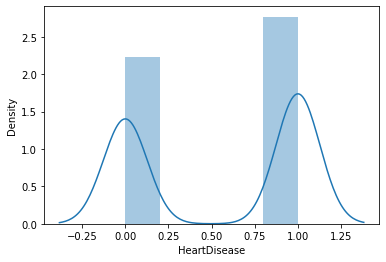

In [151]:
sns.distplot(heart_data['HeartDisease'])

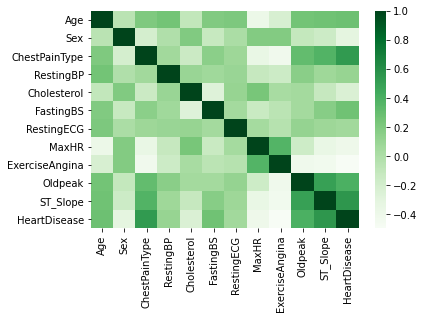

In [152]:
sns.heatmap(c,annot = False ,cmap = 'Greens')
plt.show()

In [157]:
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [158]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              2        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [159]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


In [131]:
model = LogisticRegression()

In [132]:
Y = Y.astype(float)

(array([[588., 330.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1., 160., 737.,  20.,   0.,   0.,   0.,   0.,   0.,   0.],
        [172.,   6.,  67., 310., 260.,  81.,  14.,   3.,   3.,   2.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 220., 661.,  37.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ -2.6 ,  57.96, 118.52, 179.08, 239.64, 300.2 , 360.76, 421.32,
        481.88, 542.44, 603.  ]),
 <a list of 11 BarContainer objects>)

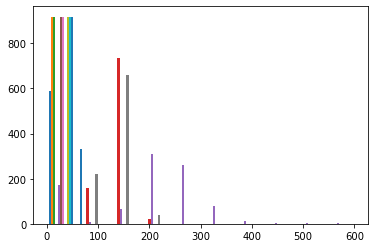

In [150]:
plt.hist(X)

In [133]:
heart_data['Sex'].replace('F',1, inplace=True)
heart_data['Sex'].replace('M',0, inplace=True)

In [134]:
print(heart_data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              2        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [170]:
model = LogisticRegression()

In [171]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [173]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8569482288828338


In [174]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [175]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8641304347826086


In [176]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [162]:
c = heart_data.corr()
c

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.210128,0.254399,-0.095282,0.198039,0.213152,-0.382045,-0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.199711,-0.005133,0.200092,-0.120076,0.018343,0.189186,0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.210128,-0.199711,1.000000,0.063102,-0.142636,0.155795,0.080268,-0.350695,-0.421398,0.316083,0.379397,0.536974
RestingBP,0.254399,-0.005133,0.063102,1.000000,0.100893,0.070193,0.097661,-0.112135,-0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.142636,0.100893,1.000000,-0.260974,0.112095,0.235792,0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.155795,0.070193,-0.260974,1.000000,0.050707,-0.131438,-0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.080268,0.097661,0.112095,0.050707,1.000000,0.048552,-0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.350695,-0.112135,0.235792,-0.131438,0.048552,1.000000,0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,-0.215793,0.190664,-0.421398,-0.155101,0.034166,-0.060451,-0.036119,0.370425,1.000000,-0.408752,-0.428706,-0.494282
Oldpeak,0.258612,-0.105734,0.316083,0.164803,0.050148,0.052698,0.114428,-0.160691,-0.408752,1.000000,0.501921,0.403951
